PROJECT OVERVIEW

Air travel accidents tend to be fatal. This study seeks to analyse some factors assosiated aircraft accidents.

PROBLEM STATEMENT

Statistically, air travel is the safest mode of transport but when accidents occur they tend to be fatal.This study seeks to understand factors associated with aircraft accidents so as to improve on safety and inform manufacturers and business opperators.

OBJECTIVES

1.Analysis of aircraft accidents trends over time.

2.Compare survival outcomes(total.uninjured) by manufacturer.

3.Identify phases of flight that are accident prone.

METHODOLOGY

In [329]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
df = pd.read_csv(r"C:\users\Peter Mutethia\Downloads\Aviation_Data.csv")

C:\ProgramData\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [331]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [332]:
df.shape
#this gives the number of rows and columns on the data set respectively

(90348, 31)

In [333]:
df.info()
#gives information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [334]:
df.describe()
#this gives the summary statistics of each column

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The data set has 90348 rows and 31 columns

DATA CLEANING

In [335]:
df.isnull().sum()
# this shows each the number of missing values in each column

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [336]:
df.columns = df.columns.str.lower()
#converts all columns names to lower case letter to make it easier to work with

In [337]:
df.columns
#checking if columns are in lower case

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [338]:
print(df.columns.tolist())

['event.id', 'investigation.type', 'accident.number', 'event.date', 'location', 'country', 'latitude', 'longitude', 'airport.code', 'airport.name', 'injury.severity', 'aircraft.damage', 'aircraft.category', 'registration.number', 'make', 'model', 'amateur.built', 'number.of.engines', 'engine.type', 'far.description', 'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured', 'weather.condition', 'broad.phase.of.flight', 'report.status', 'publication.date']


In [339]:
df.shape

(90348, 31)

In [340]:
df = df.drop_duplicates()
#removes duplicate rows


In [341]:
df.shape

(88958, 31)

In [342]:
df.head()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,purpose.of.flight,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [343]:
df['air.carrier'].head(30)


0                                NaN
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5                         Air Canada
6                                NaN
7                                NaN
8                                NaN
9                                NaN
10                               NaN
11                               NaN
12                               NaN
13                               NaN
14                               NaN
15                               NaN
16                               NaN
17                               NaN
18                               NaN
19                               NaN
20                               NaN
21                               NaN
22    Rocky Mountain Helicopters, In
23                               NaN
24                               NaN
25                               NaN
26                               NaN
2

In [344]:
df['schedule'].head(30)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     SCHD
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22    NSCH
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
Name: schedule, dtype: object

In [345]:
df['far.description'].head(30)

0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
5                 Part 129: Foreign
6                               NaN
7         Part 91: General Aviation
8         Part 91: General Aviation
9                               NaN
10                              NaN
11                              NaN
12        Part 91: General Aviation
13        Part 91: General Aviation
14        Part 91: General Aviation
15        Part 91: General Aviation
16        Part 91: General Aviation
17        Part 91: General Aviation
18        Part 91: General Aviation
19        Part 91: General Aviation
20        Part 91: General Aviation
21        Part 91: General Aviation
22    Part 135: Air Taxi & Commuter
23        Part 91: General Aviation
24        Part 91: General Aviation
25        Part 91: General Aviation
26        Part 91: General Aviation
27        Part 91: General A

In [346]:
df['aircraft.category'].head(30)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5       Airplane
6            NaN
7       Airplane
8       Airplane
9            NaN
10           NaN
11           NaN
12      Airplane
13      Airplane
14      Airplane
15      Airplane
16    Helicopter
17      Airplane
18      Airplane
19    Helicopter
20      Airplane
21      Airplane
22    Helicopter
23      Airplane
24      Airplane
25      Airplane
26      Airplane
27      Airplane
28      Airplane
29      Airplane
Name: aircraft.category, dtype: object

I wanted to uderstand these individual columns better so as to know whether i will drop them.

In [347]:
df = df.drop(columns =['far.description','schedule','air.carrier','airport.code','aircraft.category','purpose.of.flight','publication.date'])
#dropping columns i will not use in my study.

In [348]:
numerical_columns = ['number.of.engines','total.fatal.injuries','total.serious.injuries','total.minor.injuries','latitude','longitude']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df['total.uninjured'] = pd.to_numeric(df['total.uninjured'], errors='coerce')            
df[numerical_columns]= df[numerical_columns].fillna(0)
df['total.uninjured'] = df['total.uninjured'].fillna(0)
#changing numerical columns to numeric and filling missing values with 0




In [349]:
df.head()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.name,injury.severity,...,amateur.built,number.of.engines,engine.type,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,0.000000,0.000000,NaN,Fatal(2),...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0.000000,0.000000,NaN,Fatal(4),...,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),...,No,1.0,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0.000000,0.000000,NaN,Fatal(2),...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0.000000,0.000000,NaN,Fatal(1),...,No,0.0,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [350]:
df.isnull().sum()

event.id                     69
investigation.type            0
accident.number              69
event.date                   69
location                    121
country                     295
latitude                      0
longitude                     0
airport.name              36168
injury.severity            1069
aircraft.damage            3263
registration.number        1386
make                        132
model                       161
amateur.built               171
number.of.engines             0
engine.type                7146
total.fatal.injuries          0
total.serious.injuries        0
total.minor.injuries          0
total.uninjured               0
weather.condition          4561
broad.phase.of.flight     27234
report.status              6450
dtype: int64

In [351]:
df.head()

,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.name,injury.severity,...,amateur.built,number.of.engines,engine.type,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,0.000000,0.000000,NaN,Fatal(2),...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0.000000,0.000000,NaN,Fatal(4),...,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),...,No,1.0,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0.000000,0.000000,NaN,Fatal(2),...,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0.000000,0.000000,NaN,Fatal(1),...,No,0.0,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


In [352]:
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')

In [353]:
object_col = ['event.id','accident.number','location','registration.number','make','model','amateur.built','country','latitude','longitude','aircraft.damage','injury.severity','engine.type','weather.condition','broad.phase.of.flight','report.status','airport.name']
df[object_col] = df[object_col].fillna('unknown')
#filling missing values in all the above columns with unknown

In [354]:
df['injuries'] = df['total.serious.injuries'] + df['total.minor.injuries'] + df['total.fatal.injuries']
#creating a new column of total injuries 

In [355]:
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')
#changing entries in the event.date column to datetime format

In [356]:
df.isnull().sum()
#checking for missing values

event.id                   0
investigation.type         0
accident.number            0
event.date                69
location                   0
country                    0
latitude                   0
longitude                  0
airport.name               0
injury.severity            0
aircraft.damage            0
registration.number        0
make                       0
model                      0
amateur.built              0
number.of.engines          0
engine.type                0
total.fatal.injuries       0
total.serious.injuries     0
total.minor.injuries       0
total.uninjured            0
weather.condition          0
broad.phase.of.flight      0
report.status              0
injuries                   0
dtype: int64

event.date still has 69 missing values after changing the data entries to date time format so I decided ro drop the rows with the missing values

In [357]:
df = df.dropna(subset=['event.date'])

In [358]:
df.isnull().sum()

event.id                  0
investigation.type        0
accident.number           0
event.date                0
location                  0
country                   0
latitude                  0
longitude                 0
airport.name              0
injury.severity           0
aircraft.damage           0
registration.number       0
make                      0
model                     0
amateur.built             0
number.of.engines         0
engine.type               0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
weather.condition         0
broad.phase.of.flight     0
report.status             0
injuries                  0
dtype: int64

In [359]:
df.shape

(88889, 25)

In [360]:
df['broad.phase.of.flight '] = df['broad.phase.of.flight'].str.strip().str.lower()

In [361]:
df.to_csv("clean_Aviation_data.csv", index=False)


3.DATA ANALYSIS


1.TREND OF ACCIDENTS OVER TIME


In [362]:
accidents_per_year = df['event.date'].dt.year.value_counts().sort_index()
print(accidents_per_year)
#shows numbers of accidents in each year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: event.date, dtype: int64


In [363]:
x = accidents_per_year.index
x
# year of accident for my x axis

Int64Index([1948, 1962, 1974, 1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022],
           dtype='int64')

In [364]:
y = accidents_per_year.values
y
#number of accident for my y axis

array([   1,    1,    1,    1,    2,    1, 3593, 3556, 3457, 3096, 2880,
       2828, 2730, 2544, 2518, 2462, 2355, 2313, 2257, 2309, 2187, 2148,
       2226, 2209, 2220, 2063, 2020, 2085, 1952, 2031, 1851, 2016, 1893,
       1783, 1786, 1850, 1835, 1561, 1535, 1582, 1664, 1638, 1681, 1624,
       1392, 1545, 1607], dtype=int64)

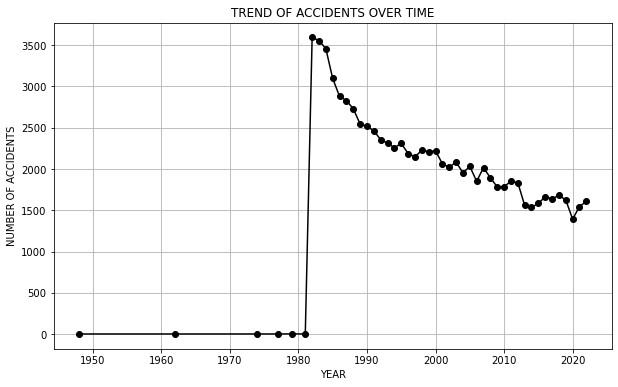

In [365]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y, marker='o',color='k')
        
ax.set_xlabel('YEAR')
ax.set_ylabel('NUMBER OF ACCIDENTS')
ax.set_title('TREND OF ACCIDENTS OVER TIME')
ax.grid(True)
plt.show()


This shows that there was a sharp increase in plane accidents from the year 1980 but Overall the number of plane accidents reduced over time.


HOW DIFFERENT MAKES COMPARE TO ONE ANOTHER WHEN IT COMES TO TOTAL UNINJURED AFTER AN ACCIDENT.

In [366]:
df['make'] = df['make'].str.strip().str.lower()
# in the make column boeing and BOEING were treated as two different entries.
#This command turns all letters in the data entries to lower case.

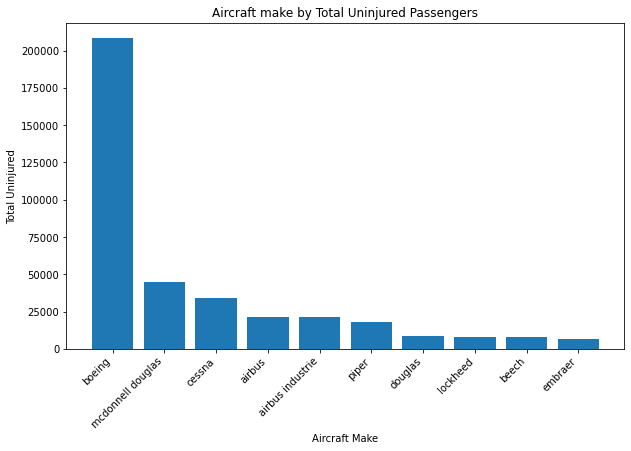

In [367]:
x = df.groupby('make')['total.uninjured'].sum().nlargest(10)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x.index, x.values)

ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Total Uninjured')
ax.set_title('Aircraft make by Total Uninjured Passengers')
plt.xticks(rotation=45, ha='right') #to make the make names fit
plt.show()


This shows how different aircraft makes compares to the number of uninjured people after an accident with boeing having the most number of total uninjured after an accident and embracer having the least.

HOW DIFFERENT AIRCRAFT MAKES COMPARE IN INJURIES AND FATALITIES 


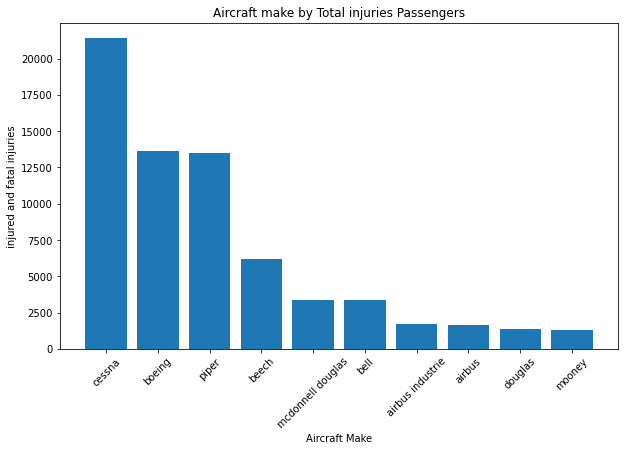

In [368]:
x = df.groupby('make')['injuries'].sum().nlargest(10)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x.index, x.values)

ax.set_xlabel('Aircraft Make')
ax.set_ylabel('injured and fatal injuries')
ax.set_title('Aircraft make by Total injuries Passengers')
plt.xticks(rotation=45) 
plt.show()


This shows how different aircraft makes compare when it comes to total injuries and fatalities recorded after an accident. Cessna has the highest number of injuries and fatalities while mooney has the lowest.

INCIDENTS IN DIFFERENT PHASES OF FLIGHT


In [369]:
df['broad.phase.of.flight'] = df['broad.phase.of.flight'].str.strip().str.lower()

# this converts all entries in the broad.phase.of.flight column to lower case.
#unknown and Unknown were being treated as two separate entities

In [370]:
x = df['broad.phase.of.flight'].value_counts()

In [371]:
x.index

Index(['unknown', 'landing', 'takeoff', 'cruise', 'maneuvering', 'approach',
       'climb', 'taxi', 'descent', 'go-around', 'standing', 'other'],
      dtype='object')

In [372]:
x.values

array([27713, 15428, 12493, 10269,  8144,  6546,  2034,  1958,  1887,
        1353,   945,   119], dtype=int64)

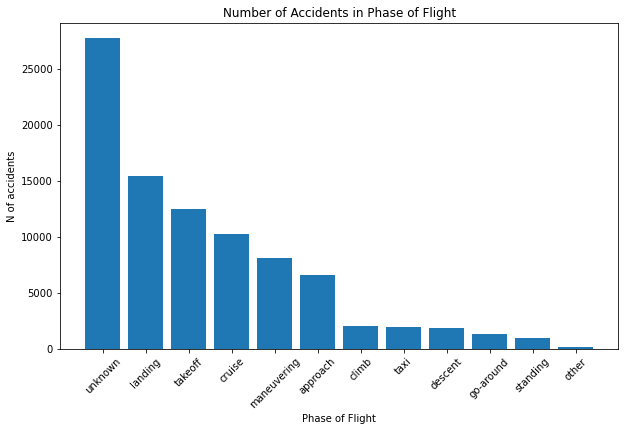

In [373]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(x.index, x.values)

ax.set_title('Number of Accidents in Phase of Flight')
ax.set_xlabel('Phase of Flight')
ax.set_ylabel('N of accidents')
plt.xticks(rotation=45)
plt.show()


this bar graph shows the frequency of incidents on each phase of flight recorded.Landing has the highest frequency of accidents recorded with other phases of flight being the lowest.

CONCLUSION


1.Aircraft accidents have decreased over time meaning safety features have improved.

2.Major manufacturers with large fleets record more accidents but also more survivors eg boeing.

3.Despite having a large number of cases whereby the phase of flight is unknown, Landing takeoff and cruise remain the riskiest phase of flight.

This study shows that air travell safety has improved overtime while highlighting the remaining risk areas.

RECOMMENDATIONS

 1.Manufacturers and Regulators could enhance safety features for critical phases. They could come up with better fail safe systems and better alert systems.

 2.For businesses, investing in data and safety training would reduce accidents and improve cost efficiency.